# **Proposta de Trabalho 2 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno:** Júlio César de Paula Ferreira
### **Matrícula:** 2020054609


### **Tema:** Clusterização - Análise de dados sobre perfil de clientes
### **Base de dados:** (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)


In [ ]:
#Bibliotecas usadas no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

##**2. Data understanding (Entendimento dos dados)**


Descrição e filtragem da base de dados: Atributos, entradas, média, quantis, desvio padrão e frequências

In [ ]:
#Carregando a base de dados

In [ ]:
df = pd.read_csv('marketing_campaign.csv',sep='\t')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df_visualization = df.dropna().copy()

In [ ]:
names = ['Income','Kidhome','Response','Year_Birth','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df_visualization[names].describe()

,Income,Kidhome,Response,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.150271,1968.820397,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,25173.076661,0.536896,0.357417,11.985554,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,1730.000000,0.000000,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,1959.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,51381.500000,0.000000,0.000000,1970.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,68522.000000,1.000000,0.000000,1977.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,666666.000000,2.000000,1.000000,1996.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


Os dados foram extraídos em 2014, para descobrir a idade aproximada dos usuários foi subtraído o ano de 2014 do ano de nascimento deles

In [ ]:
df_visualization[['age']] = (2014-df_visualization[['Year_Birth']])

O campo educação foi reduzido, sendo dividido em apenas 3 grupos. O número de crianças e adolescentes na casa foi somado em apenas um campo.

In [ ]:
df_visualization['Education'] = df_visualization['Education'].replace({'Graduation':1,'Basic':0,'PhD': 2, 'Master': 2, '2n Cycle': 2})
df_visualization['Kidhome'] = df_visualization['Kidhome']+df_visualization['Teenhome']

In [ ]:
df_visualization.drop(columns=['Teenhome'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957,1,Single,58138.0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,57
1,2174,1954,1,Single,46344.0,2,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,60
2,4141,1965,1,Together,71613.0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,49
3,6182,1984,1,Together,26646.0,1,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,30
4,5324,1981,2,Married,58293.0,1,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,Married,61223.0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,3,11,0,47
2236,4001,1946,2,Together,64014.0,3,10-06-2014,56,406,0,...,0,0,0,1,0,0,3,11,0,68
2237,7270,1981,1,Divorced,56981.0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,3,11,0,33
2238,8235,1956,2,Together,69245.0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,3,11,0,58


Uma coluna de total foi criada para somar as compras totais de cada usuário, em seguida, por meio da análise do histograma, os outliers foram removidos, deixando apenas os 95% valores mais próximos da mediana. O mesmo foi realizado para a renda dos consumidores

In [ ]:
df_visualization['total'] = df_visualization['MntWines'] + df_visualization['MntFruits'] + df_visualization['MntMeatProducts'] + df_visualization['MntFishProducts'] + df_visualization['MntSweetProducts'] + df_visualization['MntGoldProds']

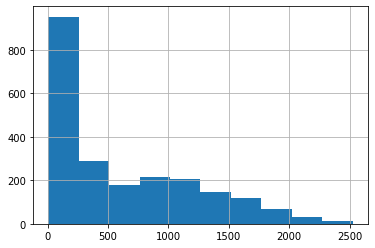

In [ ]:
df_visualization['total'].hist()

In [ ]:
df_visualization = df_visualization[((df_visualization['total']>=df_visualization['total'].quantile(.3)) & (df_visualization['total']<=df_visualization['total'].quantile(.97)))]

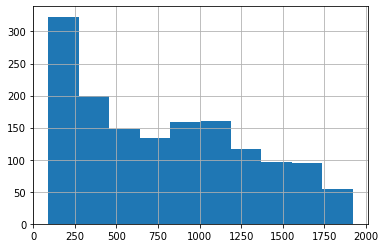

In [ ]:
df_visualization['total'].hist()

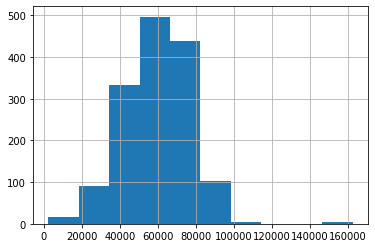

In [ ]:
df_visualization['Income'].hist()

In [ ]:
df_visualization = df_visualization[((df_visualization['Income']>=df_visualization['Income'].quantile(.3)) & (df_visualization['Income']<=df_visualization['Income'].quantile(.97)))]

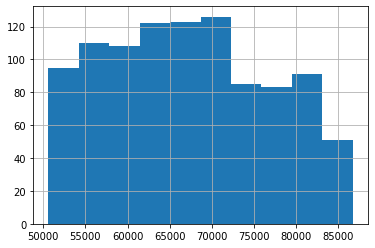

In [ ]:
df_visualization['Income'].hist()

Pela análise da educação, a grande maioria dos usuários é graduado (1) ou pós-graduado (2), apenas alguns possuem apenas educação básica (0)

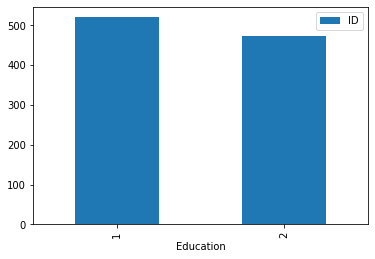

In [ ]:
df_visualization.groupby('Education').count().reset_index()[['Education','ID']].plot.bar(x='Education',y='ID')

Também foi verificada a relação entre a quantidade de crianças em casa e a renda, que apareceu a princípio ser negativa

In [ ]:
data = ['Kidhome','Income']
df_visualization[data].corr(method='pearson')

,Kidhome,Income
Kidhome,1.000000,-0.483666
Income,-0.483666,1.000000


O mês de entrada dos usuário não parece ter nenhum outlier, no geral os usuários se inscrevem igualmente durante todo o ano.

In [ ]:
df_visualization['customer_month'] = pd.DatetimeIndex(df_visualization['Dt_Customer']).month

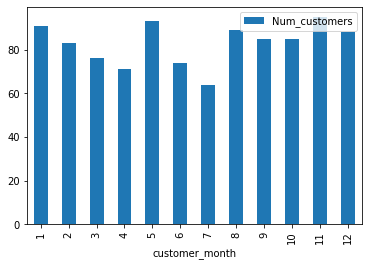

In [ ]:
df_visualization.groupby('customer_month')[['ID']].count().reset_index().rename(columns={'ID':'Num_customers'}).plot.bar(x='customer_month',y='Num_customers')

No ano de 2013 aconteceu um pico de inscrições, mas ela foi normalizada em seguida

In [ ]:
df_visualization['customer_year'] = pd.DatetimeIndex(df_visualization['Dt_Customer']).year

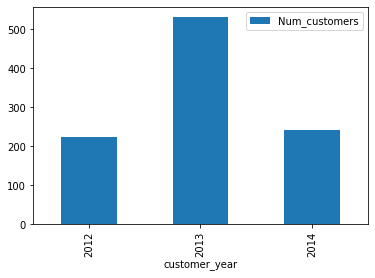

In [ ]:
df_visualization.groupby('customer_year')[['ID']].count().reset_index().rename(columns={'ID':'Num_customers'}).plot.bar(x='customer_year',y='Num_customers')

Após o tratamento básico dos dados, analisando o mapa de correlações, esses valores analisados (ano de entrada, mês de entrada, educação) não possuem uma correlação muito forte com nenhum dos valores, então faz sentido removê-los posteriormente no agrupamento.

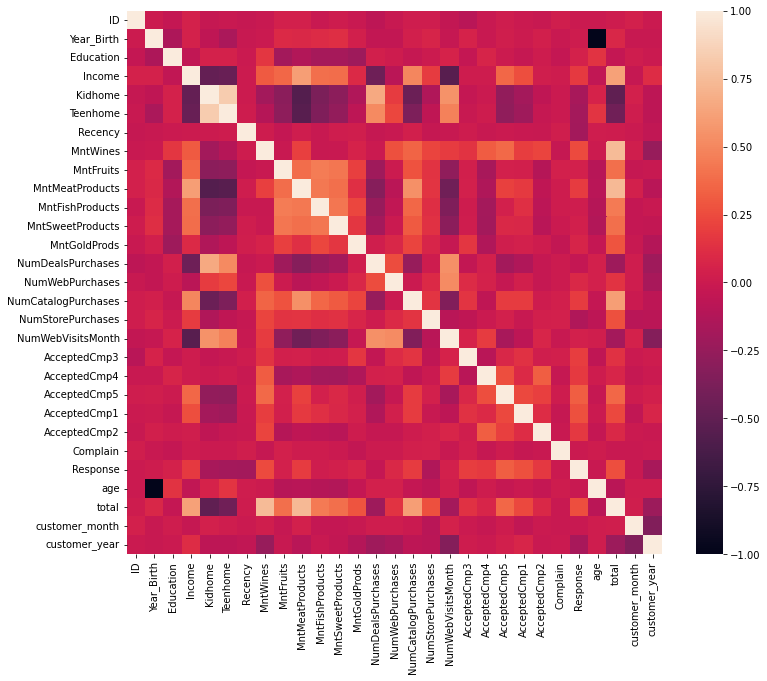

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_visualization.drop(columns=['Z_CostContact','Z_Revenue']).corr())

##**3. Data preparation (Preparação dos dados)**

É criada uma cópia dos dados e realizado o tratamento, removendo outliers e calculando os valores explicados anteriormente

In [ ]:
df_total = df.dropna().copy()
df_total[['age']] = (2014-df_total[['Year_Birth']])
df_total[['purchases']] = (df_total['NumDealsPurchases']+df_total['NumWebPurchases']+df_total['NumCatalogPurchases']+df_total['NumStorePurchases']+df_total['NumWebVisitsMonth']).to_frame()
df_total['total'] = df_total['MntWines'] + df_total['MntFruits'] + df_total['MntMeatProducts'] + df_total['MntFishProducts'] + df_total['MntSweetProducts'] + df_total['MntGoldProds']
df_total = df_total[((df_total['total']>=df_total['total'].quantile(.3)) & (df_total['total']<=df_total['total'].quantile(.97)))]

In [ ]:
df_total

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,purchases,total
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,57,32,1617
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,49,25,776
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,33,24,422
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,3,11,0,47,28,716
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,0,0,3,11,0,43,27,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,47,23,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,68,29,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,33,25,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,58,26,843


Para a clusterização, algumas categorias importates e que possuem alguma correlação com o objeto de estudo e com a base de dados foram selecionadas

In [ ]:
df_total_cluster = df_total[['Income','age','NumWebVisitsMonth','NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases', 'AcceptedCmp2','purchases','total','Response']]

In [ ]:
pca = PCA(n_components=3)
pca.fit(df_total_cluster)
df_total_cluster = pd.DataFrame(pca.transform(df_total_cluster), columns=(["pc1","pc2", "pc3"]))
df_pca_cluster = df_total_cluster.copy()

In [ ]:
df_pca_cluster

,pc1,pc2,pc3
0,-1621.393921,-861.810441,11.717494
1,11832.622857,266.178466,1.405942
2,-1491.897465,336.225279,-13.895938
3,2733.410971,132.209091,0.205952
4,-4145.712784,111.612140,-3.346801
...,...,...,...
1480,1457.022059,-520.067794,0.844711
1481,4228.274193,436.159460,20.853646
1482,-2786.145749,-510.535912,-12.919695
1483,9466.589368,148.733103,10.680308


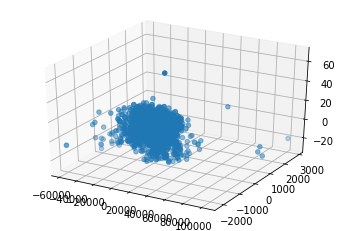

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca_cluster['pc1'],df_pca_cluster['pc2'],df_pca_cluster['pc3'])

##**4. Modeling (Modelagem)**

O primeiro passo é testar os valores de K para o k-means, para isso os dados são testados com valores de 2 a 14 e é usada a "Regra do cotovelo" para escolher o valor, ou seja, nesse caso quando a inércia para de cair significativamente. Para validar o valor, é também analisado o silhouette index, se o valor encontrado com a regra do cotovelo for muito fora da média ele deve ser descartado

In [ ]:
clusters = np.arange(2,15)
inertia = []
silh = []

for cluster in clusters:
    model = KMeans(init='k-means++', n_clusters=cluster, random_state=0)
    model.fit(df_total_cluster)
    inertia.append(model.inertia_)
    silh.append(silhouette_score(df_total_cluster, model.labels_, metric='euclidean'))


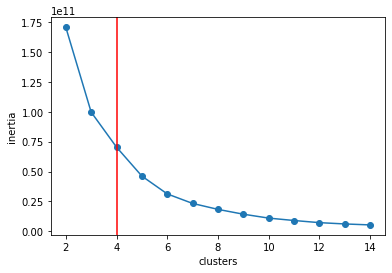

In [ ]:
plt.plot(clusters, inertia, '-o')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.axvline(4, color='r')
plt.show()

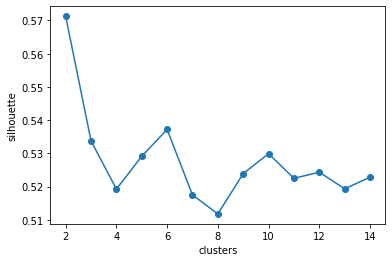

In [ ]:
plt.plot(clusters, silh, '-o')
plt.xlabel('clusters')
plt.ylabel('silhouette')
plt.show()

Nesse caso, entretanto, o valor 4 fica na média tanto do silhouette index quanto serve para a regra do cotovelo, então ele é selecionado.
Em seguida o modelo é criado e os valores distribuídos em clusters

In [ ]:
model = KMeans(n_clusters=4,init = 'k-means++').fit(df_total_cluster)

preds = model.predict(df_total_cluster)

result = df_total.copy()
result['clusters'] = preds

In [ ]:
result

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,purchases,total,clusters
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,57,32,1617,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,49,25,776,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,33,24,422,1
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,0,3,11,0,47,28,716,1
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,0,3,11,0,43,27,590,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,3,11,0,47,23,1341,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,1,0,0,3,11,0,68,29,444,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,33,25,1241,2
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,3,11,0,58,26,843,1


O cluster final pode ser visualizado com uma distribuição de pontos

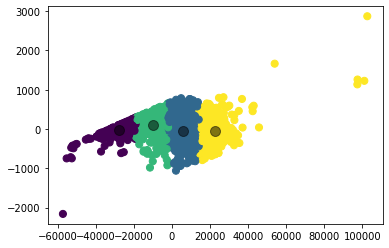

In [ ]:
plt.scatter(df_total_cluster.iloc[:, 0], df_total_cluster.iloc[:, 1], c=preds, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

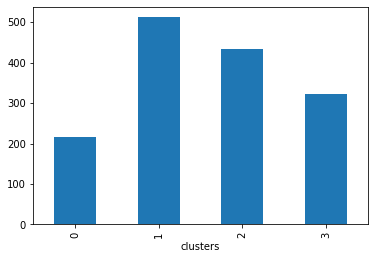

In [ ]:
result.groupby('clusters')['clusters'].count().plot.bar()

##**5. Evaluation (Validação) e Resultados**


A maior parte da validação é feita usando a Regra do Cotovelo e o Silhouette Index, o passo mais importante aqui é verificar como os resultados estão distribuídos nos clusters para verificar se os clusters são úteis para o problema e se não existe algum outlier muito relevante.

A idade nos clusters é bem distribuída, mas existe uma clara diferença na renda, o que indica que a renda é um fator extremamente significativo no padrão de consumo. Enquanto o Cluster 0 tem uma distribuição entre 0 e 40 mil o Cluster 3 já varia entre próximo de 80 e 100 mil.

<Figure size 720x720 with 0 Axes>

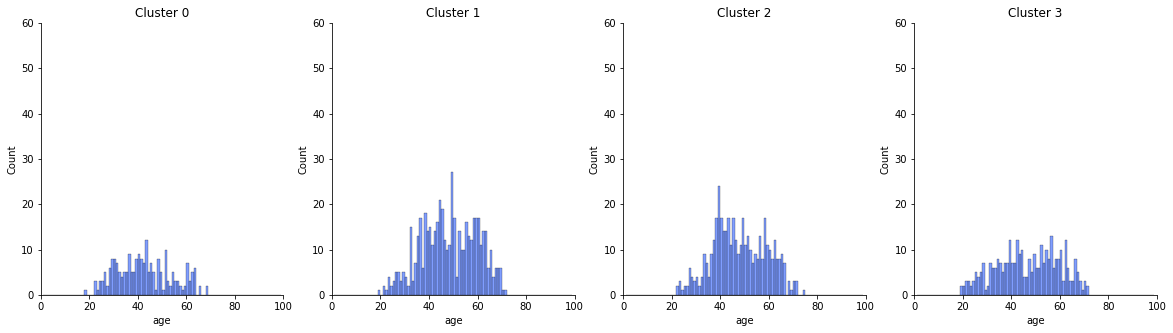

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(ncols=4, figsize=(20,5))

for i in range(4):
  ax[i].set_title("Cluster "+str(i))
  ax[i].set_xlim(0,100)
  ax[i].set_ylim(0,60)
  sns.histplot(
      result[result["clusters"]==i],
      x="age",
      hue="clusters",
      palette="bright",
      ax=ax[i],
      bins= list(range(1,100)),
      legend=False
  )
sns.despine()

<Figure size 720x720 with 0 Axes>

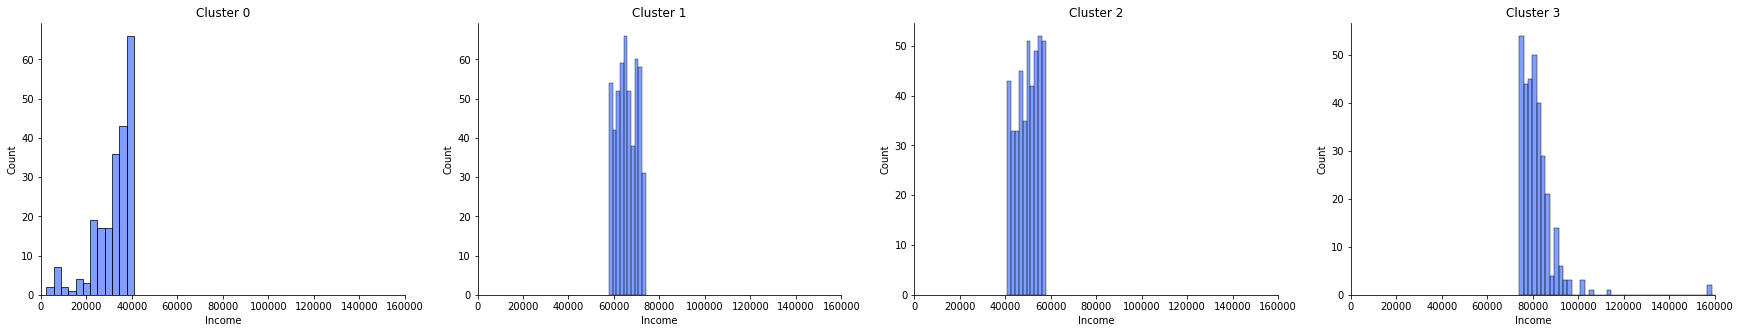

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(ncols=4, figsize=(30,5))

for i in range(4):
  ax[i].set_title("Cluster "+str(i))
  ax[i].set_xlim(0,160000)
  sns.histplot(
      result[result["clusters"]==i],
      x="Income",
      hue="clusters",
      palette="bright",
      ax=ax[i],
      legend=False
  )
sns.despine()

In [ ]:
offers = result.groupby("clusters").sum().reset_index()

In [ ]:
offers

,clusters,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,purchases,total
0,0,1186296,427884,6953639.0,143,77,10905,17718,2847,13493,...,0,1,0,3,651,2387,43,9154,4215,49820
1,1,2925714,1006642,33650635.0,71,339,24918,263609,22030,123695,...,23,29,6,5,1536,5632,58,24526,12856,495865
2,2,2272019,853469,21681664.0,170,336,21219,122613,6305,37431,...,1,6,8,1,1302,4774,61,20607,10010,203087
3,3,1863783,633488,26483489.0,27,82,15794,193897,19853,139628,...,102,76,10,2,966,3542,87,15020,7616,424341


Em seguida, foi analisada a resposta de cada cluster para as ofertas, tanto no geral quanto em relação apenas às últimas ofertas (Campo Response). Cada cluster possui uma relação de aceitação totalmente diferente para as ofertas, com exceção do cluster 3, que tem boa aceitação para todas as ofertas.

In [ ]:
offers['last_responses'] = offers['Response']/(offers['AcceptedCmp1']+offers['AcceptedCmp2']+offers['AcceptedCmp3']+offers['AcceptedCmp4']+offers['AcceptedCmp5'])

In [ ]:
offers['last_responses']

0    1.954545
1    0.426471
2    0.655914
3    0.339844
Name: last_responses, dtype: float64

<Figure size 720x720 with 0 Axes>

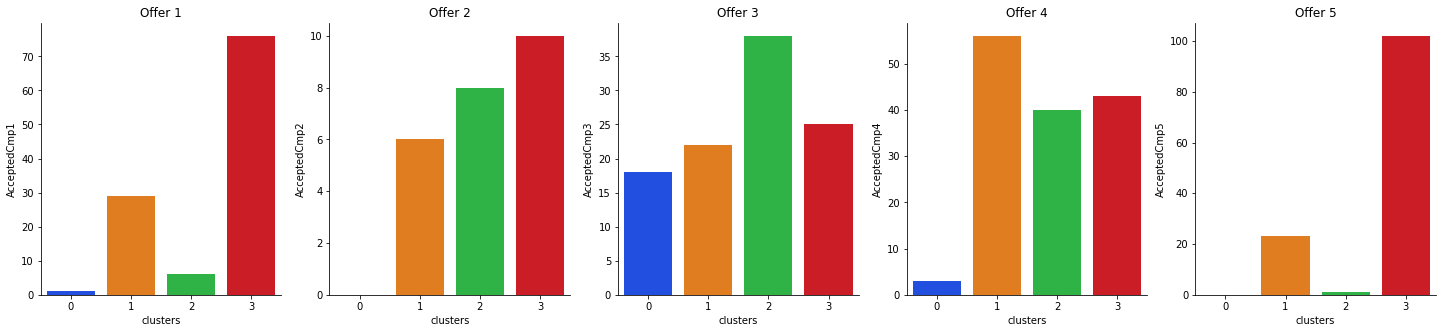

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(ncols=5, figsize=(25,5))

for i in range(5):
  ax[i].set_title("Offer "+str(i+1))
  sns.barplot(
      data = offers,
      y = "AcceptedCmp"+str(i+1),
      x = "clusters",
      palette="bright",
      ax = ax[i]
  )
sns.despine()

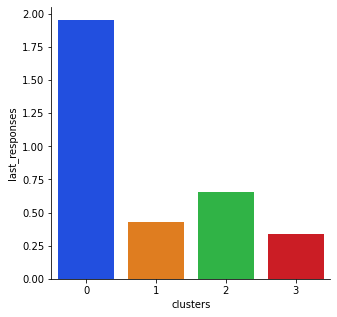

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(
      data = offers,
      y = "last_responses",
      x = "clusters",
      palette="bright"
  )
sns.despine()

Em relação aos produtos, os clusters não possuem diferenças muito significativas, ou seja, no geral os grupos consomem os produtos na mesma proporção.

<Figure size 1440x1440 with 0 Axes>

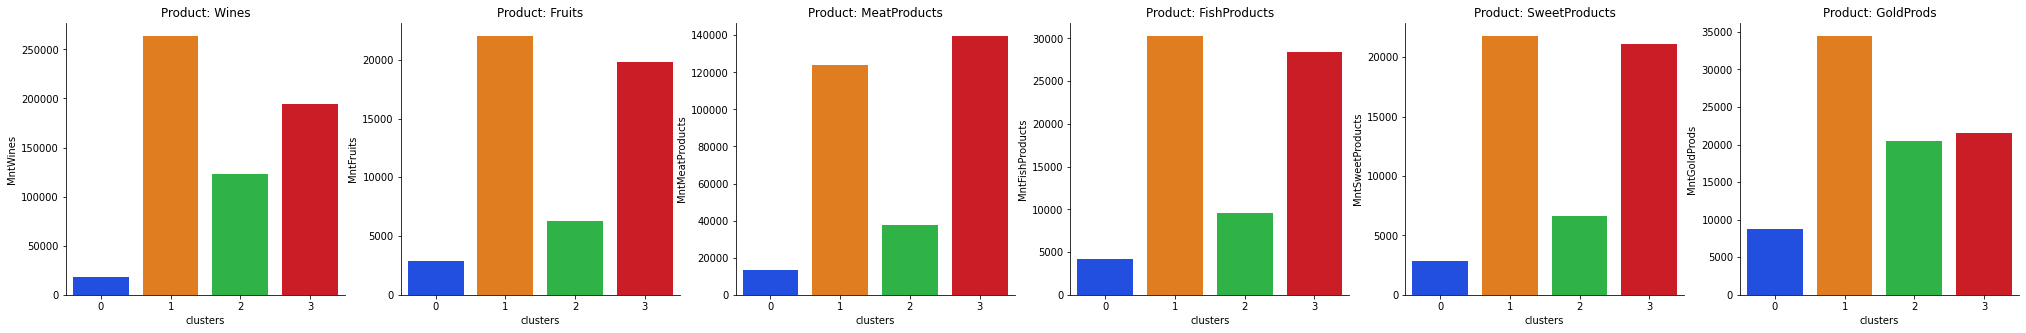

In [ ]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(ncols=6, figsize=(35,5))
names = ['Wines','Fruits','MeatProducts','FishProducts','SweetProducts','GoldProds']
for i in range(6):
  ax[i].set_title("Product: "+names[i])
  sns.barplot(
      data = offers,
      y = "Mnt"+names[i],
      x = "clusters",
      palette="bright",
      ax = ax[i]
  )
sns.despine()